# Numerical Methods for Solivng Ordinary Differential Equations: ***RC Circuit***

## *importing the modules and packages, Configuration of the Figs and Data directories*

In [76]:
include("../DiffEqs/DESolver.jl")
using Plots, LaTeXStrings, StatsPlots, StatsBase, Distributions, JLD, ProgressMeter, SpecialFunctions, Latexify, DataFrames, BenchmarkTools
figpath = "../../Figs/Q1/"
datapath = "../../Data/Q1/"
Plots.default(titlefontsize = 12, tickfontsize = 10, labelfontsize = 12,
    fontfamily = "Computer Modern", frame = :box, label = nothing)

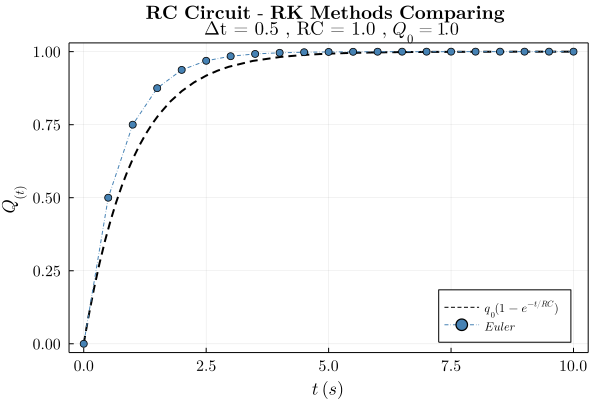

In [116]:
q₀, rc = 1.0, 1.0
Parameters = Dict(:ẋ => (t, x) -> (q₀ .- x / rc), :x₀ => [0.0], :t₀ => 0.0, :t₁ => 10.0, :h => 0.5)


plot(t -> q₀ * (1 - exp(-t / rc)), Parameters[:t₀], Parameters[:t₁], lw = 2, ls = :dash, color = :black, label = L"q_0(1 - e^{-t/RC})")

time, charge = DiffEqsSolver.EulerDES(; Parameters...)
plot!(time, getindex.(charge, 1), ls = :dashdot, marker = :circle, c = :steelblue, label = L"Euler")

plot!(title = "𝐑𝐂 𝐂𝐢𝐫𝐜𝐮𝐢𝐭 - 𝐑𝐊 𝐌𝐞𝐭𝐡𝐨𝐝𝐬 𝐂𝐨𝐦𝐩𝐚𝐫𝐢𝐧𝐠 \n Δt = $(Parameters[:h]) , RC = $rc , " * L"Q_0=%$q₀", xlabel = L"t\ (s)", ylabel = L"Q_{(t)}", legend = :bottomright)


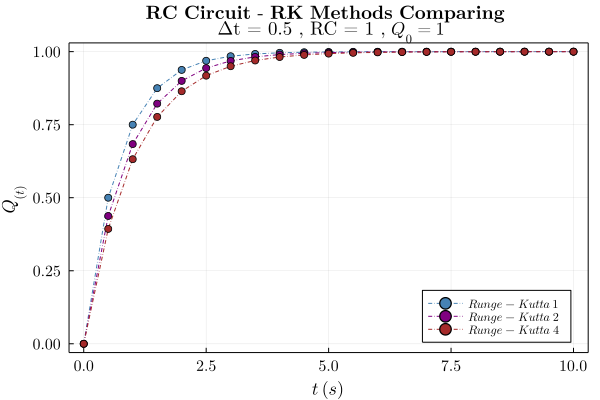

In [384]:
q₀, rc = 1, 1
Parameters = Dict(:ẋ => (t, x) -> (q₀ .- x / rc), :x₀ => [0.0], :t₀ => 0.0, :t₁ => 10.0, :h => 0.5)
time, charge = DiffEqsSolver.EulerDES(; Parameters...)
plot(time, getindex.(charge, 1), ls = :dashdot, marker = :circle, c = :steelblue, label = L"Runge-Kutta\ 1")

time, charge = DiffEqsSolver.RK2DES(; Parameters...)
plot!(time, getindex.(charge, 1), ls = :dashdot, marker = :circle, c = :purple, label = L"Runge-Kutta\ 2")

time, charge = DiffEqsSolver.RK4DES(; Parameters...)
plot!(time, getindex.(charge, 1), ls = :dashdot, marker = :circle, c = :brown, label = L"Runge-Kutta\ 4")

plot!(title = "𝐑𝐂 𝐂𝐢𝐫𝐜𝐮𝐢𝐭 - 𝐑𝐊 𝐌𝐞𝐭𝐡𝐨𝐝𝐬 𝐂𝐨𝐦𝐩𝐚𝐫𝐢𝐧𝐠 \n Δt = $(Parameters[:h]) , RC = $rc , " * L"Q_0=%$q₀", xlabel = L"t\ (s)", ylabel = L"Q_{(t)}", legend = :bottomright)



In [557]:
ΔtList = exp.(range(0.001, 1.0, length = 1000))
δEuler = Float64[]
δRK2 = Float64[]
δRK4 = Float64[]

q₀, rc = 0.5, 1
Q = t -> q₀ * (1 - exp(-t / rc))

for Δt ∈ ΔtList
    Parameters = Dict(:ẋ => (t, x) -> (q₀ .- x / rc), :x₀ => [0.0], :t₀ => 0.0, :t₁ => 500.0, :h => log(Δt))
    time, charge = DiffEqsSolver.EulerDES(; Parameters...)
    push!(δEuler, abs(sum(getindex.(charge, 1) - Q.(time))))
    time, charge = DiffEqsSolver.RK2DES(; Parameters...)
    push!(δRK2, abs(sum(getindex.(charge, 1) - Q.(time))))
    time, charge = DiffEqsSolver.RK4DES(; Parameters...)
    push!(δRK4, abs(sum(getindex.(charge, 1) - Q.(time))))
end

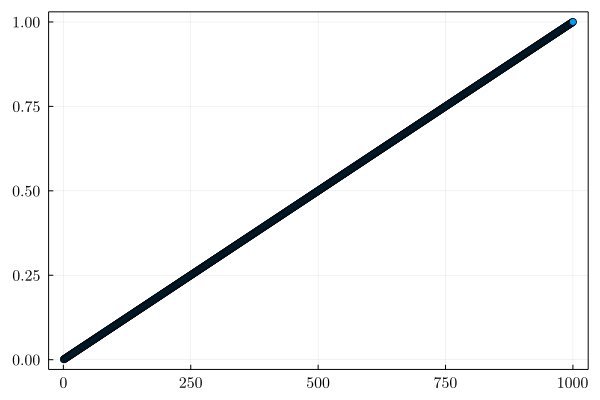

In [566]:
scatter(log.(exp.(range(0.001, 1.0, length = 1000))))

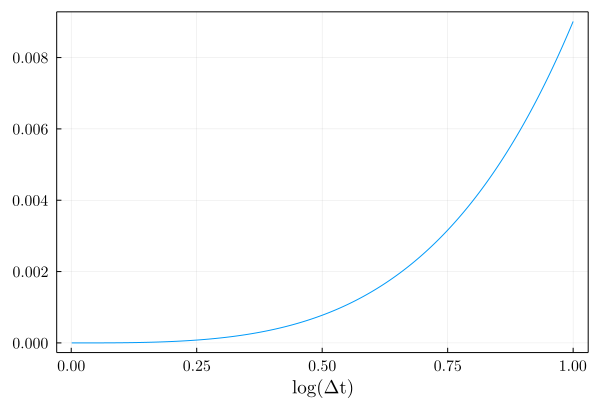

In [565]:
# RK4LogPlot = plot(log.(log.(ΔtList)), log.(δRK4), xlabel = "log(Δt)", ylabel = "log()")
RK4Plot = plot(log.(ΔtList), δRK4, xlabel = "log(Δt)")

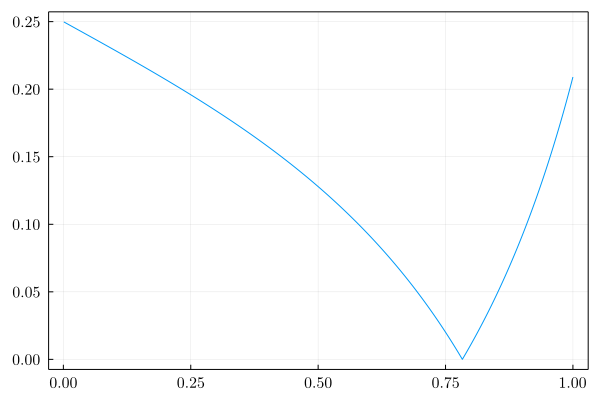

In [564]:
# RK2LogPlot = plot(log.(log.(ΔtList)), log.(δRK2))
RK2Plot = plot(log.(ΔtList), δRK2)

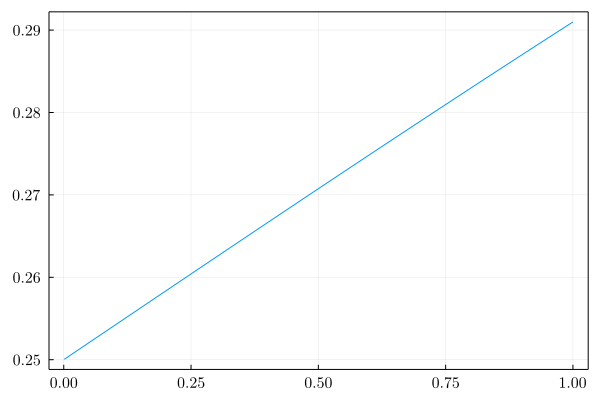

In [563]:
# EulerLogPlot = plot(log.(ΔtList), log.(δEuler))
EulerPlot = plot(log.(ΔtList), δEuler)